As defined in https://blbadger.github.io/henon-map.html the Henon map is defined as a discrete dynamical system:

$$x_{n+1} = 1 - ax_{n}^{2} + y_{n}$$
$$y_{n + 1} = bx_{n}$$

Setting $a = 1.4$, $b = 0.3$, and $x_{0} = 0$ and $y_{0} = 0$ the simulation is:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')

In [4]:
def henon_attractor(x, y, a=1.4, b=.3):
	'''Computes the next step in the Henon 
	map for arguments x, y with kwargs a and
	b as constants.
	'''
	x_next = 1 - a * x ** 2 + y
	y_next = b * x
	return x_next, y_next

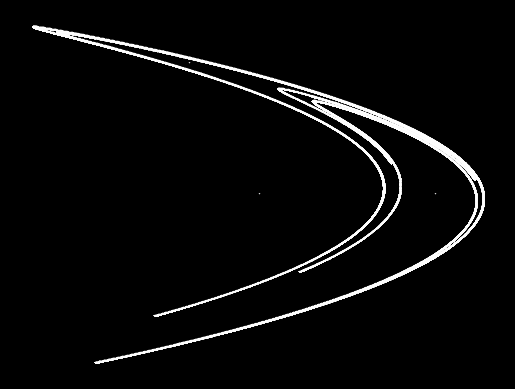

In [9]:
# number of iterations and array initialization
steps = 100000
X = np.zeros(steps + 1)
Y = np.zeros(steps + 1)

# starting point
X[0], Y[0] = 0, 0

# add points to array
for i in range(steps):
	x_next, y_next = henon_attractor(X[i], Y[i])
	X[i+1] = x_next
	Y[i+1] = y_next
	
# plot figure
plt.plot(X, Y, '^', color='white', alpha = 0.8, markersize=0.3)
plt.axis('off')
plt.show()
plt.close()

1.2729721286897366 -1.2846597148703338
0.381891638606921 -0.3853979144611001


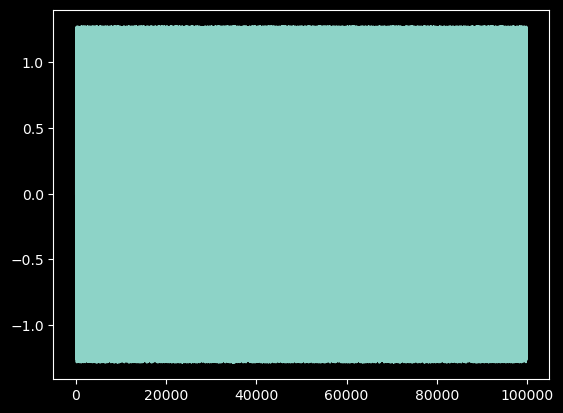

In [13]:
plt.plot(X)
print(X.max(), X.min())
print(Y.max(), Y.min())

/tmp/ipykernel_115804/2994303186.py:12: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  y = odeint(f, y0, t, args=(a, b))


a = 0.00218249
b = 6.20701
y0 = -1.55176


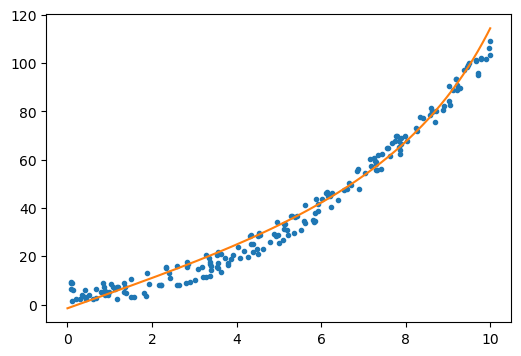

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

def f(y, t, a, b):
    return a*y**2 + b

def y(t, a, b, y0):
    """
    Solution to the ODE y'(t) = f(t,y,a,b) with initial condition y(0) = y0
    """
    y = odeint(f, y0, t, args=(a, b))
    return y.ravel()

# Some random data to fit
data_t = np.sort(np.random.rand(200) * 10)
data_y = data_t**2 + np.random.rand(200)*10

popt, cov = curve_fit(y, data_t, data_y, [-1.2, 0.1, 0])
a_opt, b_opt, y0_opt = popt

print("a = %g" % a_opt)
print("b = %g" % b_opt)
print("y0 = %g" % y0_opt)

import matplotlib.pyplot as plt
t = np.linspace(0, 10, 2000)
plt.plot(data_t, data_y, '.',
         t, y(t, a_opt, b_opt, y0_opt), '-')
plt.gcf().set_size_inches(6, 4)
plt.savefig('out.png', dpi=96)
plt.show()

In [ ]:
# From Supplementary Material: A systematic framework for functional connectivity measures section 1.5
def henon_system(x0, T):
	np.random.seed(seed=123456789)
	channels = x0.shape[0]

	x_t = np.zeros((channels, T))
	x_t[:, 0] = x0

	Cij = np.zeros((channels, channels))

	a = 1.4
	b = 0.3

	noise = np.zeros((channels, T))

	for timestep in range(1, T):
		for channel_i in range(channels):
			sum1 = 0 
			for channel_j in range(channels):
				sum1 += Cij[channel_i, channel_j] * x_t[channel_i, timestep - 1] * x_t[channel_j, timestep - 1]
			sum2 = 0
			for channel_j in range(channels):
				sum2 += Cij[channel_i, channel_j]
			noise[channel_i, timestep] = np.random.normal(loc=0.0, scale=1.0, size=None)
			x_t[channel_i, timestep] = a - sum1 - ((1 - sum2) * x_t[channel_i, timestep - 1]**2) + b * x_t[channel_i, timestep - 2] + noise[channel_i, timestep]
	return x_t

def mean_squared_error(x_real, x_system):
	assert x_real.shape == x_system.shape
	return (np.square(x_real - x_system)).mean()